In [1]:
from decimal import Decimal # for filenames

import pdb #Equivalent of keyboard in MATLAB, just add "pdb.set_trace()"

import os
import sys

In [2]:
###############################################################################
#                       HyperParameters and RunOptions                        #
###############################################################################
class Hyperparameters:
    max_hidden_layers = 10 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 100
    activation        = 'elu'
    classification_act= 'linear'
    regularization    = 0.05
    manifold          = 0.07
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 70
    num_epochs        = 50
    
    num_networks      = 6
    

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from Utilities.get_image_data import load_data
from Utilities.form_train_val_test_batches import form_train_val_test_batches
from Utilities.NN_FC_layerwise import FCLayerwise
from Utilities.NN_FC_layerwise_new import FCLayerwise_new
from Utilities.NETW import Final
from Utilities.Net import Final_Network
from Utilities.Net_new import Final_Network_ALGO_II
from Utilities.create_data import create_new
from Utilities.create_data_multiply import create_new_multiply
from Utilities.loss_and_accuracies import data_loss_classification, data_loss_regression
from Utilities.manifold_regularization import manifold_classification
from Utilities.manifold_regularization_new import manifold_classification_new
from Utilities.optimize_layerwise import optimize
from Utilities.optimize_step_II import optimize_step
from Utilities.additive_output import net_output 
from Utilities.plot_and_save_figures_layerwise import plot_fig
from joblib import Parallel, delayed
import multiprocessing
import random

In [4]:
class Hyperparameters_new:
    max_hidden_layers =3 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 10
    activation        = 'relu'
    classification_act= 'linear'
    regularization    = 0.000
    manifold          = 0.000
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 100
    num_epochs        = 100

In [5]:
class RunOptions:
    def __init__(self):    
        #=== Choose Which GPU to Use ===#
        self.which_gpu = '1'
        
        #=== Use L_1 Regularization ===#
        self.use_L1 = 1
        
        #=== Choose Data Set ===#
        self.data_MNIST = 0
        self.data_CIFAR10 = 0 
        self.data_CIFAR100 = 0
        self.data_regression=1
        
        #=== Random Seed ===#
        self.random_seed = 1234


In [6]:
###############################################################################
#                                 File Paths                                  #
###############################################################################         
class FilePaths():    
    def __init__(self, hyperp, run_options):  
        #=== Declaring File Name Components ===# 
        self.NN_type = 'FC'
        if run_options.data_MNIST == 1:
            self.dataset = 'MNIST'
        if run_options.data_CIFAR10 == 1:
            self.dataset = 'CIFAR10'
        if run_options.data_CIFAR100 == 1:
            self.dataset = 'CIFAR100'
        if run_options.data_regression == 1:
            self.dataset = 'Abalone'
        if hyperp.regularization >= 1:
            hyperp.regularization = int(hyperp.regularization)
            regularization_string = str(hyperp.regularization)
        else:
            regularization_string = str(hyperp.regularization)
            regularization_string = 'pt' + regularization_string[2:]                        
        node_TOL_string = str('%.2e' %Decimal(hyperp.node_TOL))
        node_TOL_string = node_TOL_string[-1]
        error_TOL_string = str('%.2e' %Decimal(hyperp.error_TOL))
        error_TOL_string = error_TOL_string[-1]
        
        #=== File Name ===#
        if run_options.use_L1 == 0:
            self.filename = self.dataset + '_' + self.NN_type + '_mhl%d_hl%d_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)
        else:
            self.filename = self.dataset + '_' + self.NN_type + '_L1_mhl%d_hl%d_r%s_nTOL%s_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, regularization_string, node_TOL_string, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)

        #=== Saving Trained Neural Network and Tensorboard ===#
        #self.NN_savefile_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Trained_NNs/' + self.filename # Since we need to save four different types of files to save a neural network model, we need to create a new folder for each model
        self.NN_savefile_directory =  self.filename
        self.NN_savefile_name = self.NN_savefile_directory + '/' + self.filename # The file path and name for the four files
        #self.tensorboard_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Tensorboard/' + self.filename

###############################################################################



In [ ]:
data_train,new_label,labels_train=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,9)
        

2022-04-21 16:11:16.294460: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 16:11:16.324002: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2593550000 Hz
2022-04-21 16:11:16.326024: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55aaae09a700 executing computations on platform Host. Devices:
2022-04-21 16:11:16.326058: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2022-04-21 16:11:16.328255: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Beginning Training
            Epoch 0            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Model: "fc_layerwise_new"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  110       
_________________________________________________________________
upsampling_layer (Dense)     multiple                  140       
_________________________________________________________________
classification_layer (Dense) multiple                  11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Time per Batch: 0.06
ListWrap

Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.96

Training Set: Loss: 2.667e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.251

Previous Layer Relative # of 0s: 0.0000000

            Epoch 9            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWr

ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.91

Training Set: Loss: 2.648e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.291

Previous Layer Relative # of 0s: 0.0000000

            Epoch 18            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1

Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.96

Training Set: Loss: 2.613e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.706

Previous Layer Relative # of 0s: 0.0000000

            Epoch 28            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListW

ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.94

Training Set: Loss: 2.629e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.473

Previous Layer Relative # of 0s: 0.0000000

            Epoch 37            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1

Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.97

Training Set: Loss: 2.624e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.288

Previous Layer Relative # of 0s: 0.0000000

            Epoch 47            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.04
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListW

ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 1.00

Training Set: Loss: 2.572e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.383

Previous Layer Relative # of 0s: 0.0000000

            Epoch 56            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1

Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.95

Training Set: Loss: 2.543e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.270

Previous Layer Relative # of 0s: 0.0000000

            Epoch 66            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListW

ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.91

Training Set: Loss: 2.516e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.445

Previous Layer Relative # of 0s: 0.0000000

            Epoch 75            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100,

ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.97

Training Set: Loss: 2.490e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.458

Previous Layer Relative # of 0s: 0.0000000

            Epoch 84            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 0.93

Training Set: Loss: 2.454e+00, Accu

ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
Time per Epoch: 1.06

Training Set: Loss: 2.477e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 7.543

Previous Layer Relative # of 0s: 0.0000000

            Epoch 94            
Abalone_FC_L1_mhl10_hl100_rpt05_nTOL4_eTOL4_b70_e50
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 6 batches of size 100:
Time per Batch: 0.05
ListWrapper([13, 100, 100, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 10, 10, 1])
ListWrapper([13, 100, 100,

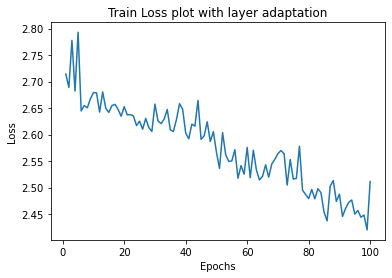

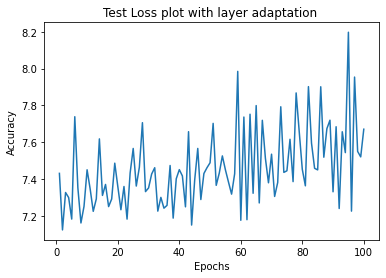

In [7]:
if __name__ == "__main__":     

    trainable=2
    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed) 
    


    
    #for i in range(1,hyperp.num_networks):
    for i in range(6,7):
    #=== Initiate training ===#
        #trainer(hyperp, run_options, file_paths,i) 
        if i>1:
            trainable=2

    
            
        if trainable==2:
        
        
        
            #=== GPU Settings ===#
            os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
            os.environ["CUDA_VISIBLE_DEVICES"] = run_options.which_gpu
    
            #=== Neural Network ===#
            if run_options.use_L1 == 0:
                kernel_regularizer = None
                bias_regularizer = None  
            else:
                kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
                bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
            
            
            multiply=0
        
            if multiply==0:

                data_train,new_label,labels_train=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
        
            if multiply==1:

                data_train,new_label,labels_train=create_new_multiply(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
     
        #=== Construct Validation Set and Batches ===# 
            data_and_labels_train, data_and_labels_val, data_and_labels_test,\
            num_data_train, num_data_val, num_data_test,\
            num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
            = form_train_val_test_batches(data_train, labels_train, \
                                      data_test, labels_test, \
                                      hyperp.batch_size, new_label, run_options.random_seed)
        
        
        if i==1 and trainable==2:
            NN = FCLayerwise(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer)    
            NN._set_inputs( data_train)
        if i>1:
            kernel_regularizer = None
            bias_regularizer = None
            NN = FCLayerwise_new(hyperp_new, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer) 
            NN._set_inputs( data_train)
    #=== Training ===#
    #                                 Training                                    #
###############################################################################
        if trainable>2:
            del NN
            NN = Final(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer,trainable)   
            #NN._set_inputs(data_train)
            NN.load_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable-1))
            #NN=tf.keras.models.load_model("WEIGHTS"+'/'+"model"+str(1)+str(trainable-1))
        


        if i==1:
            hyperp_n=hyperp
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply,trainable)   
        
        if i>1:
            hyperp_n=Hyperparameters_new()
            optimize_step(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification_new,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply)   
        
        #NN.save("WEIGHTS"+'/'+"model"+str(1)+str(trainable))
        if not os.path.exists("WEIGHTS"):
            os.makedirs("WEIGHTS")
        NN.save_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable))
        
        if i==1:
            plot_fig(hyperp, run_options, file_paths,i,trainable+1)
            
        if i>1:
            plot_fig(hyperp_new, run_options, file_paths,i,3)
        
        

        
        
        

        
                
        
        # a=[10, 8, 7.5, 7.2 ]
        #lr=[0.05, 0.05, 0.05, 0.05] 
        
        # random_seed=[123, 123, random, random]
        
        # (6.178,9.744), (4.265, 7.847), (3.253, 7.494), (2.802, 7.111)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(10, activation='elu', input_shape=(13,)))
model.add(layers.Dense(1, activation='linear'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(data_train,new_label,batch_size=100,epochs=100,verbose=1)


In [ ]:
batch_pred_test = model(data_test)
y_pred_test_add=net_output(hyperp,hyperp_new,data_test, run_options, data_input_shape, label_dimensions,4,batch_pred_test)
batch_pred_test=batch_pred_test+y_pred_test_add
mean_accuracy_test = tf.keras.metrics.Mean()
mean_accuracy_test(data_loss_regression(batch_pred_test, labels_test,label_dimensions))

In [ ]:
model.save("WEIGHTS"+'/'+"model"+str(9))

In [ ]:
"WEIGHTS"+'/'+"model_weights"+str(i_val)
hidden_layers_list.insert(0, NoDependency(1))        


In [ ]:
hidden_layers_list[0]

In [ ]:
hidden_layers_list

In [ ]:
len(hidden_layers_list)

In [ ]:
            Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(2-1)).expect_partial()
    
            y_pred=Network(data_train)


In [ ]:
new_label=tf.reshape(new_label,(len(y_pred),1))

In [ ]:
y_pred

In [ ]:
new_label

In [ ]:
np.multiply(new_label,y_pred)

In [ ]:
ff=data_and_labels_train_new.shuffle(num_data_train,seed=random_seed)
            
data_and_labels_train_new_new = ff.batch(batch_size)
for batch_num, (batch_data_train, batch_labels_train,labels) in data_and_labels_train_new_new.enumerate():
    labels

In [ ]:
x_train_new = batch_data_train[batch_labels_train == 1]


In [ ]:
batch_pred_train,val=NN(x_train_new)
dimension=np.shape(val)
        

length=len(x_train_new)

In [ ]:
new_one=val[1:length]

In [ ]:
sum_val = 0.1*length*dimension[1]*tf.math.reduce_mean(tf.keras.losses.mean_squared_error(new_one, val[0:length-1]))

In [ ]:
    import matplotlib.pyplot as plt
    storage_loss_array=[]
    storage_accuracy_array=[]
    max_hidden_layers=7
    no_epoch=hyperp.num_epochs
    
    for i in range(2,max_hidden_layers):
    
        trainable_hidden_layer_index=i
    
    
        name=file_paths.NN_savefile_name + "_metrics_hl" + str(trainable_hidden_layer_index) +str(1)+ '.csv'


        df_metrics =pd.read_csv(name)

        array_metrics = df_metrics.to_numpy()

        storage_loss_array=np.concatenate((storage_loss_array, array_metrics[:,0]), axis=0)
 
        storage_accuracy_array=np.concatenate((storage_accuracy_array, array_metrics[:,1]), axis=0)
    
    if not os.path.exists("plots"):
        os.makedirs("plots")
#=== Plot and Save Losses===#
    fig_loss = plt.figure()
    x_axis = np.linspace(1, len(storage_loss_array), len(storage_accuracy_array), endpoint = True)
    plt.plot(x_axis, storage_loss_array)
    plt.title('Train Loss plot with layer adaptation' )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,600)
    plt.xlim(0,150)
    fig_loss.savefig("plots"+'/'+"loss"+str(1)+'.png')


In [ ]:
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train,new_label)).shuffle(num_data_train, seed=random_seed)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets
kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
(data_train, labels_train), (data_test, labels_test) = datasets.cifar10.load_data()
#(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
#data_train = tf.reshape(data_train, (len(data_train), 28*28))
#data_test = tf.reshape(data_test, (len(data_test), 28*28))
data_train = tf.reshape(data_train, (len(data_train), 32*32*3))
data_test = tf.reshape(data_test, (len(data_test), 32*32*3))
    
label_dimensions = 10
data_input_shape = data_train.shape[1:]

In [ ]:
labels_train=np.squeeze(labels_train,axis=1)

In [ ]:
Network=Final_Network(hyperp, run_options, data_input_shape, label_dimensions,
                      kernel_regularizer, bias_regularizer) 

In [ ]:
Network.load_weights("WEIGHTS"+'/'+"model_weights1")

In [ ]:
num_data_train = len(data_train)
data_and_labels_train_new = data_and_labels_train_full.take(num_data_train)

In [ ]:
ff=data_and_labels_train_new.shuffle(num_data_train,seed=random_seed)
batch_size=100           
data_and_labels_train_new_new = ff.batch(batch_size)

In [ ]:
for batch_num, (batch_data_train, batch_labels_train,labels) in data_and_labels_train_new_new.enumerate():
    labels

In [ ]:
x_train_new = batch_data_train[batch_labels_train == 0]

In [ ]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_test = tf.data.Dataset.from_tensor_slices((data_test, labels_test)).batch(batch_size)
num_batches_test = len(list(data_and_labels_test))

#=== Partitioning Out Validation Set and Constructing Batches ===#
current_num_data_train = num_data_train
num_data_train = int(0.8 * num_data_train)
num_data_val = current_num_data_train - num_data_train
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [ ]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

In [ ]:
labels=tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [ ]:
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train,labels)).shuffle(num_data_train, seed=random_seed)

In [ ]:
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [ ]:
for batch_num, (batch_data_train, batch_labels_train,labels) in data_and_labels_train.enumerate():
    batch=batch_num
    batch_data_train = batch_data_train
    batch_labels_train=batch_labels_train
    lab=labels

In [ ]:
lab


In [ ]:
y_true = tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [ ]:
y_true

In [ ]:
np.mean(tf.keras.losses.mean_squared_error(new_one, val[0:dimension[0]-1]))

In [ ]:

x_train_new = batch_data_train[batch_labels_train == 1]
batch_pred_train,val=NN(x_train_new)



In [ ]:
y_true = tf.one_hot(tf.cast(y_true,tf.int64), label_dimensions, dtype=tf.float32)

In [ ]:
loss

In [ ]:
np.linalg.norm(val[0]-val[1])